<a href="https://colab.research.google.com/github/dimou-gk/Deep-dive-ML/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Load Dataset & Analysis

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Create Plots

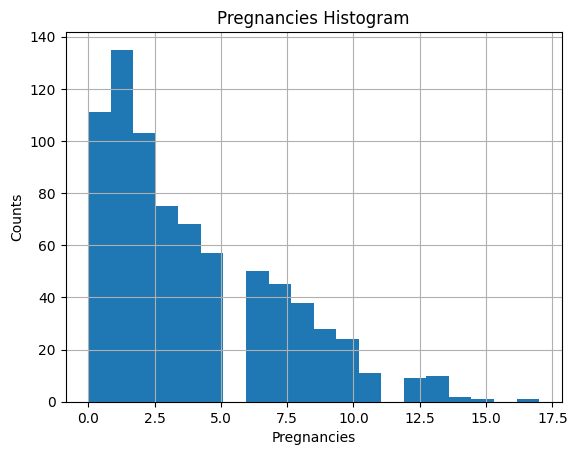

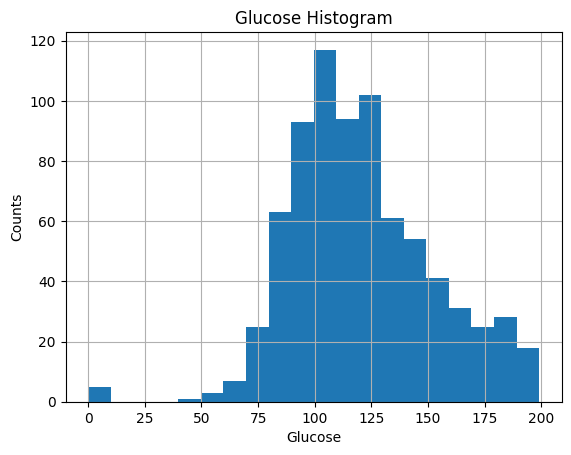

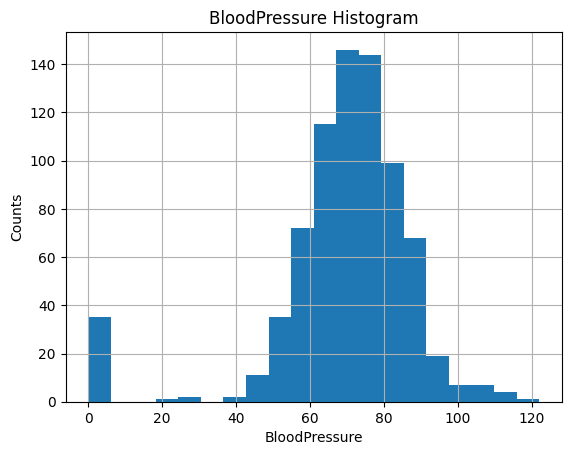

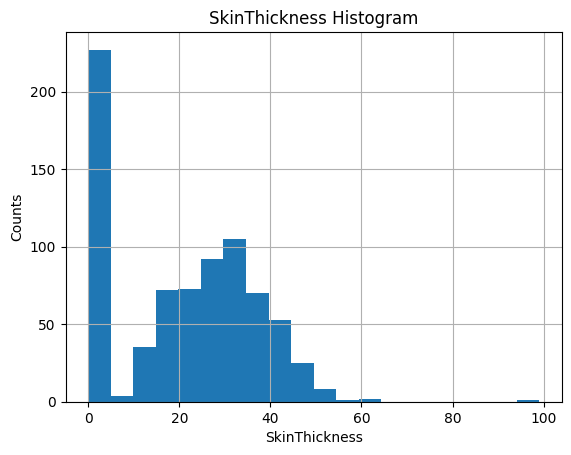

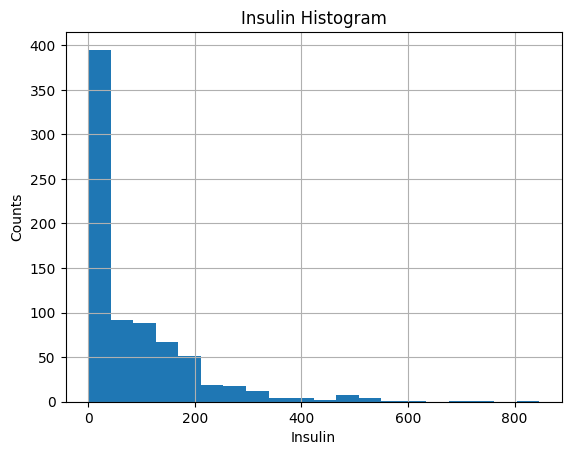

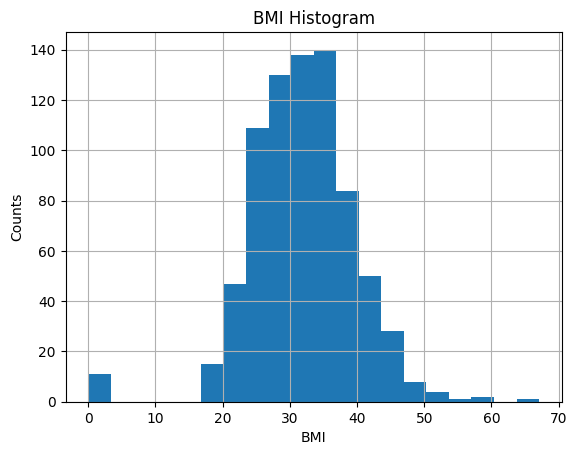

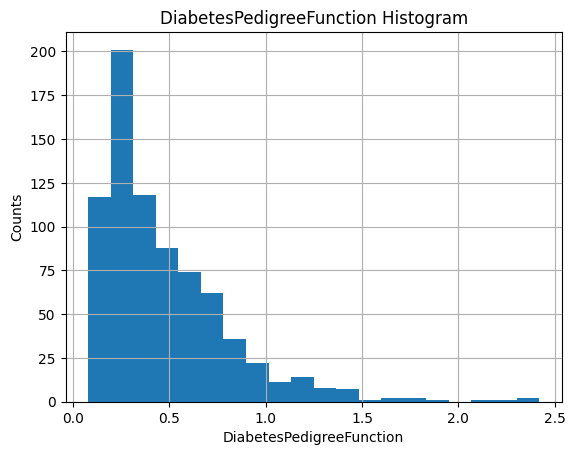

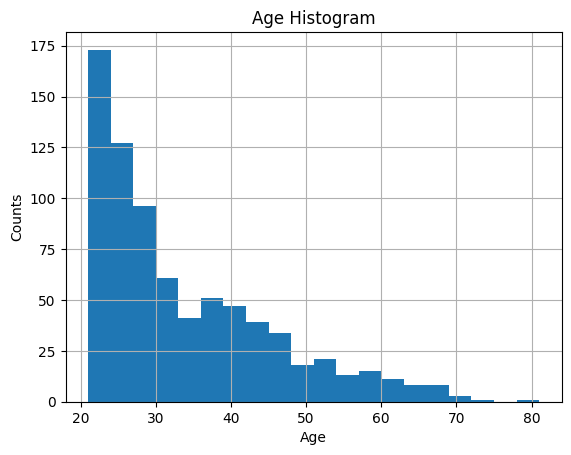

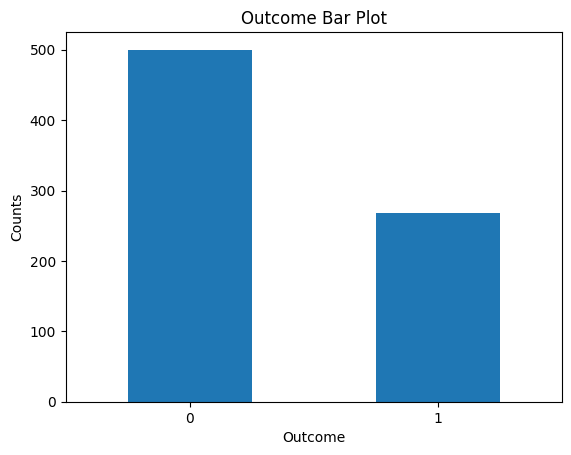

In [ ]:
#Print Histograms
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()
print('\n')

df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()
print('\n')

df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()
print('\n')

df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()
print('\n')

df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()
print('\n')

#For Outcome column display a bar plot
df['Outcome'].value_counts().plot.bar()
plt.title('Outcome Bar Plot')
plt.xlabel('Outcome')
plt.xticks(rotation=0) #fix rotation of x axis
plt.ylabel('Counts')
plt.show()



---


2. The data quality seems to be suboptimal. This is mainly due to two reasons:

* **Unrealistic values** (probably in place of missing values). For example, we observe approximately 37 instances of 0 for BloodPressure, which is physically impossible.
* **Highly imbalanced data** observed in multiple features, especially in the target variable, where fewer positive cases are present. This can reduce a machine learning model's accuracy in detecting positive cases.





---


3. Age feature follows a Right-Skewed distribution. This can cause a negative impact on a ML model's performance as it can introduce Bias towards younger age groups, as the model is mostly trained for younger individuals resulting in less accurate predictions for older individuals (>50).

#4. High level of **Glucose**

In [ ]:
print(df['Glucose'].corr(df['Outcome']))
#We can see a moderate relationship between the two features. This means that the result of diabetes is somehow linked to Glucose.
#As a result, when Glucose is increasing in value an increased chance of Diabetes can (usually) be expected.

0.46658139830687295


#Convert DataFrame to Numpy arrays

In [ ]:
x = df.drop(columns=['Outcome']).to_numpy()
y = df['Outcome'].to_numpy()

x.shape, y.shape

((768, 8), (768,))

#Split Dataset to Train-Test set

In [ ]:
x_train, x_test, y_train, y_test, idx_train, idx_test = train_test_split(x, y, df.index, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

#Training & Testing

In [ ]:
#Training
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train,y_train)

#Testing
y_pred = model.predict(x_test)
y_pred


accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is: {accuracy*100}')

The accuracy of the model is: 77.92207792207793




---


7. Generally speaking, and especially in our application, medical predictions prioritize minimizing false negatives (FN). This is because it's preferable to have a patient undergo additional medical exams, which may be costly but are not life-threatening, rather than miss opportunities for early interventions that could lead to devastating health consequences.

  Thus, it would be worse for our classifier to predict that a patient does not have diabetes when truth is, he does.

#8. Accuracy per Age group

age_group
0-25     0.837838
25-50    0.729323
>50      0.875000
dtype: float64


<ipython-input-109-6bcb399b182e>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_group = df_test.groupby('age_group', observed=True).apply(lambda x: accuracy_score(x['y_test'], x['y_pred']))


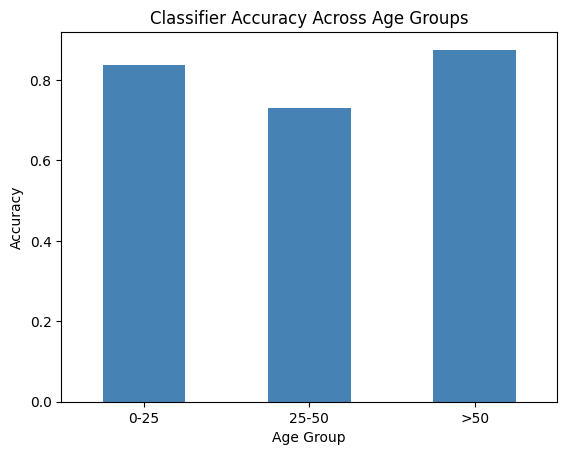

In [ ]:
bins = [0,25,50, np.inf]
labels = ['0-25', '25-50', '>50']

df_test = df.loc[idx_test]

df_test['y_test'] = y_test
df_test['y_pred'] = y_pred

#Creation of a new column with age categories
df_test['age_group'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)


#df_test[(df_test['y_test'] == df_test['y_pred']) & (df_test['Age'].between(0,25))]

#Calculate accuracy for each age group
accuracy_per_group = df_test.groupby('age_group', observed=True).apply(lambda x: accuracy_score(x['y_test'], x['y_pred']))
print(accuracy_per_group)


accuracy_per_group.plot(kind='bar', color='steelblue')
plt.title('Classifier Accuracy Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

From what we can see our classifier works best on ages >50 and worse on ages 25-50

#9. Training & Testing with Penalty

In [ ]:
#Training with l1
model = LogisticRegression(penalty= 'l1', max_iter=1000, random_state=0, solver='liblinear')
model.fit(x_train,y_train)

#Testing
y_pred = model.predict(x_test)
y_pred

accuracy_l1 = accuracy_score(y_test, y_pred)

#----------------------
#Training with l2
model = LogisticRegression(penalty= 'l2', max_iter=1000, random_state=0)
model.fit(x_train,y_train)

#Testing
y_pred = model.predict(x_test)
y_pred

accuracy_l2 = accuracy_score(y_test, y_pred)

#----------------------
#Training with elastic net
model = LogisticRegression(penalty= 'elasticnet', max_iter=1500, random_state=0, solver='saga', l1_ratio=0.5)
model.fit(x_train,y_train)

#Testing
y_pred = model.predict(x_test)
y_pred


accuracy_elasticnet = accuracy_score(y_test, y_pred)

accuracy_df = pd.DataFrame({
    'Penalty': ['l1', 'l2', 'elastic net'],
    'Accuracy': [accuracy_l1, accuracy_l2, accuracy_elasticnet]
})

accuracy_df

,Penalty,Accuracy
0,l1,0.783550
1,l2,0.779221
2,elastic net,0.735931


#10. Repetitive 5 & 6

In [ ]:
import statistics
import math

avg_accuracy = 0
accuracy_array = []

for i in range(0,10):

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
  x_train.shape, y_train.shape, x_test.shape, y_test.shape


  #Training
  model = LogisticRegression(max_iter=1000, random_state=i)
  model.fit(x_train,y_train)

  #Testing
  y_pred = model.predict(x_test)
  y_pred


  accuracy = accuracy_score(y_test, y_pred)
  avg_accuracy += accuracy
  accuracy_array.append(accuracy)
  #print(f'The accuracy of the model is: {accuracy*100}')

avg_accuracy /= len(accuracy_array)


#---------------------------------------------------------
#By hand calculation
temp = 0
temp2 = 0

for i,accuracy in enumerate(accuracy_array):
  temp = (accuracy-avg_accuracy)**2
  temp2 += temp

variance = 0

variance = temp2/len(accuracy_array)
stddev = math.sqrt(variance)
#----------------------------------------------------------

print(f'The average accuracy of the model is: {avg_accuracy*100}')
print(f'The standard deviation of accuracy of the model is: {statistics.stdev(accuracy_array)}')
print(f'The standard deviation (calculated by hand) of accuracy of the model is: {stddev}')

#The difference occur because of different roudings between the two methods

The average accuracy of the model is: 77.27272727272727
The standart deviation of accuracy of the model is: 0.019706349615797505
The standart deviation (calculated by hand) of accuracy of the model is: 0.018695084746051253


##Μέρος ΙΙ - Γραμμική Παλινδρόμηση

In [ ]:
#Dataset is already loaded
#df.head()

x = df[[
    'Pregnancies','BloodPressure', 'BMI','Age'
]]

y = df['Insulin']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

In [ ]:
#Training
model = LinearRegression()
model.fit(x_train,y_train)

#Testing
y_pred = model.predict(x_test)
y_pred

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print(f'Mean absolute error is: {MAE}')
print(f'Mean squared error is: {MSE}')

Mean absolute error is: 79.82886812357148
Mean squared error is: 10883.737319676153


2. MAE is the most suitable metric for the following reasons:


*   It is provided in the unit as Insulin make it easier to underastand how off are my predictions
*   MAE treats all errors equally, without giving emphasis on larger errors. Our applications goal is to minimize overall prediction errors not overpenalize the prementioned larger ones.



# Visualizing Coefficients

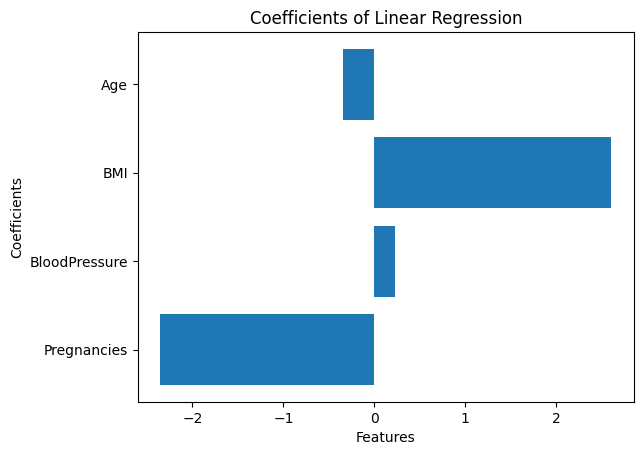

In [ ]:
features = x.columns
coefficients = model.coef_

plt.barh(x.columns, coefficients)
plt.title('Coefficients of Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

3. As we can see, BMI has the largest coefficient, meaning it also has the most significant impact on predicting insulin levels in the dataset. However, the method of using coefficients to measure importance has possible problems associated with it:

* It assumes a linear relationship between each feature and the target variable, so if the actual relationships are nonlinear, the importance could be misleading.
* Coefficients in linear regression are sensitive to the scale of features. If one feature has significantly larger values than others, its coefficient could appear larger due to size, not importance.



In [ ]:
from sklearn.linear_model import Lasso

alpha_array = []
mae_array = []

for i in range(1,6):
  model = Lasso(alpha=i*0.2)
  model.fit(x_train,y_train)

  #Testing
  y_pred = model.predict(x_test)
  y_pred

  MAE = mean_absolute_error(y_test, y_pred)

  alpha_array.append(i*0.2)
  mae_array.append(MAE)

reporting_df = pd.DataFrame({
    'Alpha (λ)': alpha_array,
    'MAE': mae_array
})

reporting_df

,Alpha (λ),MAE
0,0.2,79.826659
1,0.4,79.824444
2,0.6,79.822228
3,0.8,79.820012
4,1.0,79.817797


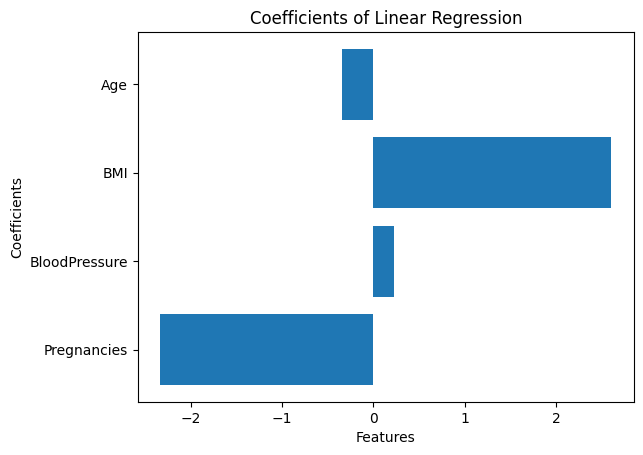

In [ ]:
#Lasso
model_lasso = Lasso(alpha=0.2)
model_lasso.fit(x_train,y_train)

#Testing
y_pred = model_lasso.predict(x_test)
y_pred


features = x.columns
coefficients = model_lasso.coef_

plt.barh(x.columns, coefficients)
plt.title('Coefficients of Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

We can see again that BMI is the most important feature

In [ ]:
x_noBMI = df[[
    'Pregnancies','BloodPressure', 'Age'
]]

x_train, x_test, y_train, y_test = train_test_split(x_noBMI, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 3), (537,), (231, 3), (231,))

In [ ]:
#Training
model = LinearRegression()
model.fit(x_train,y_train)

#Testing
y_pred = model.predict(x_test)
y_pred

MAE = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error is: {MAE}')

Mean absolute error is: 81.15252059621696


The error increases, so the model gets worse with the removal of the best feature.